# Previsione del prezzo di Auto Usate

Realizzato da: Luca Carabini (luca.carabini@studio.unibo.it)

## Caricamento delle Librerie

Procedo con il caricamento delle librerie per effetuare operazioni sui dati

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Caricamento Dataset e breve descrizione

Il Dataset è stato preso da [kaggle](https://www.kaggle.com/datasets/muhammadawaistayyab/used-cars-prices-in-uk), contiene alcune vendite di auto usate nel Regno Unito

In [9]:
used_cars = pd.read_csv("used_cars_UK.csv", index_col=0)
used_cars.head(5)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


Analizziamo ora i le feature:
- `title`: contiene la marca e il modello
- `Price`: contiene il prezzo in sterline (sarà la nostra variabile da predirre)
- `Mileage(miles)`: Miglia percorse
- `Registration_Year` : Anno di immatricolazione
- `Previous Owners`: Indica il numero di proprietari
- `Fuel type` : tipo di carburante
- `Body type` : Categoria auto (Berlina, suv, ecc..)
- `Engine` : Cilindrata
- `Gearbox` : Cambio
- `Doors` : Neumero delle porte
- `Seats` : Numero dei posti a sedere
- `Emission Class` : Classe di Emissione
- `Service history` : Storico della manutenzione 

## Analisi e modifiche delle singole Feature

Inizio rinominando alcune colonne

In [14]:
used_cars = used_cars.rename(columns={"title":"make", "Price":"price", "Mileage(miles)":"mileage", 
                          "Registration_Year":"registration_year", "Previous Owners":"previous_owners", 
                          "Fuel type":"fuel", "Body type":"body", "Engine":"engine", "Gearbox":"gearbox", 
                          "Doors":"doors", "Seats":"seats", "Emission Class":"emission_class"  })
used_cars

,make,price,mileage,registration_year,previous_owners,fuel,body,engine,gearbox,doors,seats,emission_class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723,Renault Megane,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
4724,Audi A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
4725,BMW 3 Series,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
4726,Honda Accord,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


### Service history


Osservando i dati di questa feature, si nota che l'85% di essi sono nulli, quindi procederò ad eliminarla

In [18]:
(used_cars.loc[:,"Service history"].isna().sum()*100)/used_cars.shape[0]

85.3459972862958

In [19]:
used_cars = used_cars.drop(columns="Service history")

Ora posso togliere tutte le righe NaN

In [23]:
used_cars = used_cars.dropna()

### make

Questa feature contiene la marca e il modello dell'auto.
Andrò a separare la marca dal modello.

Inizio con il definire una funzione split che ritorna il ritorna il numero di caratteri che compongono la marcha

In [28]:
def split (name) :
    count = 0
    for s in name :
        if (s == " ") :
            return count
            
        else :
            count += 1

Proseguo con la separazione e la creazione di una nuova feature che conterrà il modello dell'auto

In [31]:
for index, row in used_cars.iterrows():
    title = used_cars.loc[index,"make"]
    s = split(title)
    used_cars.loc[index,"make"] = title[:s]
    used_cars.loc[index,"model"] = title[s+1:]

Vediamo ora la distribuzione di marche e modelli

In [33]:
used_cars.loc[:,"model"].value_counts()

model
Corsa      104
Focus       89
Astra       86
Fiesta      79
Polo        76
          ... 
Jimny        1
Tarraco      1
Agila        1
308 CC       1
Prelude      1
Name: count, Length: 367, dtype: int64

In totale sono presenti 427 modelli di auto

Possiamo notare che ci sono molti modelli che però hanno un numero di istanze molto basso. Infatti circa la metà di essi, sono presenti solo 1 volta nel dataset

In [36]:
(used_cars.loc[:,"model"].value_counts() == 1).sum()

163

Procederò quindi ad eliminare le istanze del dataset che contengono un modello poco usato, così da evitare problemi durante la validazione, e rendendo più efficace e preciso il modello

In [38]:
delete = used_cars["model"].value_counts()[used_cars["model"].value_counts() < 10].index
used_cars = used_cars[~used_cars['model'].isin(delete)]

Per quanto riguarda le marche invece c'è una predominanza della Vauxhall

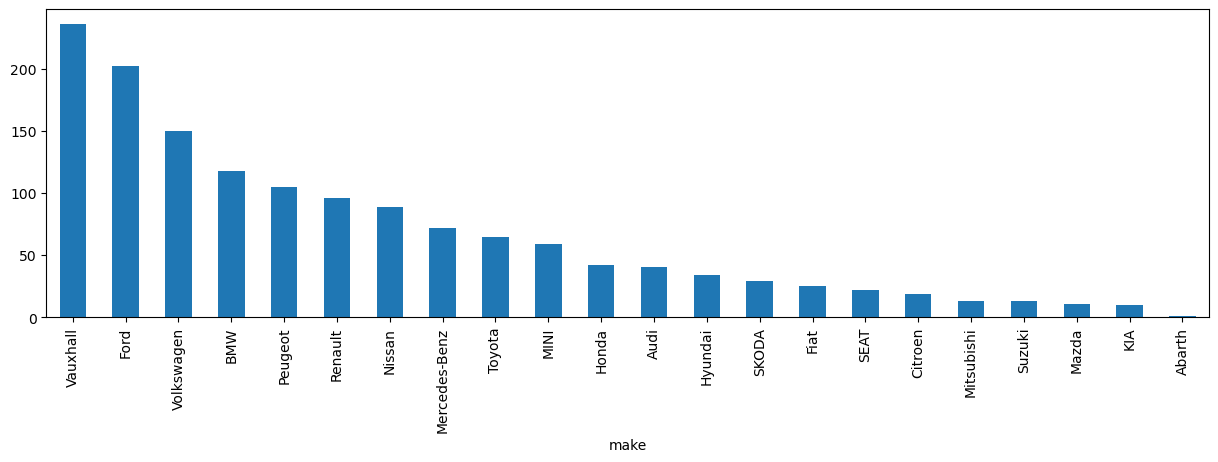

In [40]:
used_cars["make"].value_counts().plot.bar(figsize=(15, 4))
plt.show()

In [41]:
delete = used_cars["make"].value_counts()[used_cars["make"].value_counts() < 10].index

In [42]:
used_cars = used_cars[~used_cars['make'].isin(delete)]

Anche in questo caso ho eliminato istanze che contengono marche poco presenti nel dataset

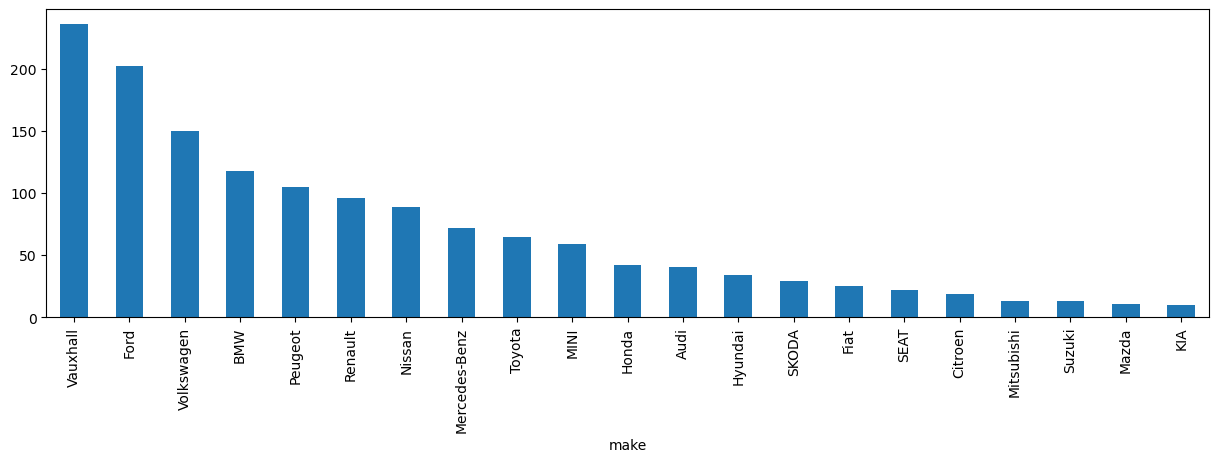

In [44]:
used_cars["make"].value_counts().plot.bar(figsize=(15, 4))
plt.show()

### price

Questa feature rappresenta il prezzo espresso in sterline

In [47]:
used_cars["price"].describe()

count     1451.000000
mean      5758.718815
std       4632.576630
min        400.000000
25%       2395.000000
50%       3995.000000
75%       7995.000000
max      23220.000000
Name: price, dtype: float64

La colonna del prezzo ha una deviazione alta, in quanto il prezzo massimo è di molto superiore rispotto alla media generale dei prezzi

### previous_owners

In [50]:
used_cars["previous_owners"].value_counts()

previous_owners
2.0    352
1.0    346
3.0    302
4.0    237
5.0    140
6.0     38
7.0     26
8.0      7
9.0      3
Name: count, dtype: int64

I valori di questa feature sono distribuiti abbastanza bene, ovviamente scarseggiano auto con molti proprietari perchè poco piazziabili sul mercato

### fuel

In [54]:
used_cars["fuel"].value_counts()

fuel
Petrol                   961
Diesel                   437
Petrol Hybrid             29
Petrol Plug-in Hybrid     23
Diesel Hybrid              1
Name: count, dtype: int64

C'è una predominanza di auto a disel e benzina, scarseggiano gli altri tipo di carburanti essendo più nuovi

### Body

In [59]:
used_cars["body"].value_counts()

body
Hatchback      1091
Saloon          102
SUV              97
Estate           78
Coupe            45
MPV              25
Convertible      13
Name: count, dtype: int64

I tipi di auto più comuni sono le berline a seguire i suv anche se notevolmente di meno

### engine

Questa feature indica la cilindrata espressa in Litri

Renderemo questa variabile numerica togliendo la L perchè superflua.

In [65]:
used_cars["engine"].unique()

array(['1.4L', '1.2L', '1.6L', '1.8L', '2.0L', '1.3L', '1.9L', '1.5L',
       '2.2L', '3.0L', '1.0L', '2.4L', '2.1L', '2.5L', '3.5L', '2.3L',
       '0.9L', '1.7L', '5.0L', '1.1L'], dtype=object)

In [66]:
for index, row in used_cars.iterrows():
    engine = used_cars.loc[index, "engine"]
    used_cars.loc[index,"engine"] = np.float64(engine[:-1])

### gearbox

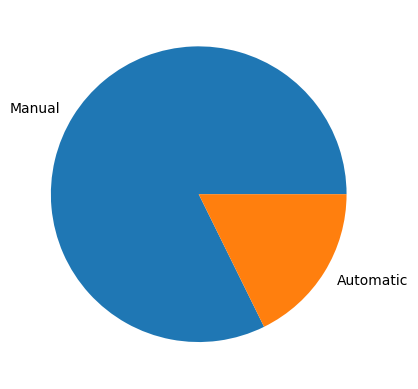

In [71]:

plt.pie(used_cars["gearbox"].value_counts(), labels=["Manual", "Automatic"]);

Abbiamo una prevalenza di auto Manuali

### emission_class

In [74]:
used_cars["emission_class"].value_counts()

emission_class
Euro 5    526
Euro 6    500
Euro 4    388
Euro 3     33
Euro 2      3
Euro 1      1
Name: count, dtype: int64

Da questi dati si nota che c'è una predominanza di auto abbastanza nuove e poche auto vecchie (euro 3,2,1)

Andiamo inoltre ad eliminare la scritta Euro, perchè superflua. Inoltre la rendiamo una variabile numerica e non più categorica

In [79]:
for index, row in used_cars.iterrows():
    emissionClass = used_cars.loc[index,"emission_class"]
    used_cars.loc[index,"emission_class"] = np.int64(emissionClass[-1])
used_cars

,make,price,mileage,registration_year,previous_owners,fuel,body,engine,gearbox,doors,seats,emission_class,model
0,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Fabia
1,Vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Corsa
3,MINI,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Hatch
9,Peugeot,1299,87000,2008,5.0,Diesel,Hatchback,1.6,Manual,5.0,5.0,4,207
11,Vauxhall,2950,79000,2011,4.0,Petrol,Hatchback,1.8,Manual,5.0,5.0,5,Insignia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,Vauxhall,4999,60139,2015,2.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,6,Astra
4717,Vauxhall,4999,60139,2015,2.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,6,Astra
4722,Nissan,1695,104000,2009,3.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4,Qashqai
4723,Renault,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4,Megane


### Dataset finale

La dimensione del dataset si è ridotta notevolmente causa dell'eliminazione delle marche e modelli poco presenti, e pulizia generale di righe con dati nulli in alcune feature(maggiormente nella feature dei proprietari precedenti)

In [84]:
used_cars

,make,price,mileage,registration_year,previous_owners,fuel,body,engine,gearbox,doors,seats,emission_class,model
0,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Fabia
1,Vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Corsa
3,MINI,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Hatch
9,Peugeot,1299,87000,2008,5.0,Diesel,Hatchback,1.6,Manual,5.0,5.0,4,207
11,Vauxhall,2950,79000,2011,4.0,Petrol,Hatchback,1.8,Manual,5.0,5.0,5,Insignia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,Vauxhall,4999,60139,2015,2.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,6,Astra
4717,Vauxhall,4999,60139,2015,2.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,6,Astra
4722,Nissan,1695,104000,2009,3.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4,Qashqai
4723,Renault,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4,Megane


Tutte queste operazioni possono essere effettuate in unico for, decommentando il seguente codice

In [86]:

#for index, row in used_cars.iterrows():
#    title = used_cars.loc[index,"title"]
#    s = split(title)
#    used_cars.loc[index,"title"] = title[:s]
#    used_cars.loc[index,"model"] = title[s+1:]
#    engine = used_cars.loc[index, "Engine"]
#    used_cars.loc[index,"Engine"] = np.float64(engine[:-1])
#    emissionClass = used_cars.loc[index,"Emission Class"]
#    used_cars.loc[index,"Emission Class"] = np.int64(emissionClass)
#    used_cars.loc[index,"Emission Class"] = np.int64(emissionClass[-1])
#used_cars


## Preparazione dei Dati

### Suddivisione Variabili

Inizio isolando la variabile target, che in questo caso è il prezzo

In [92]:
y = used_cars["price"]
X = used_cars.drop(columns="price")

### Individuazione Variabili

Procedo, individuando le varabili categoriche e quelle numeriche, questo servirà in seguito per le operazioni di preprocessing

In [95]:
used_cars.head(1)

,make,price,mileage,registration_year,previous_owners,fuel,body,engine,gearbox,doors,seats,emission_class,model
0,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,Fabia


In [96]:
numeric_vars = ["mileage", "registration_year", "previous_owners", "engine", "doors", "seats", "emission_class"]
categorical_vars = ["make", "fuel", "body", "gearbox", "model" ]
for cat in categorical_vars :
    used_cars[cat] = used_cars[cat].astype("category")

### Operazioni di Preprocessing

Nella cella di addestramento dei vari modelli andrò ad eseguire una Standardizzazione per le varabili numeriche e un One-Hot encoding per le variabili categoriche

Il procedimento lo metterò direttamente in Pipeline

### Suddivisione Dati

Eseguirò una divisione classica 70/30, successivamente eseguirò una suddivisione più approfondita usato la nested cross validation 

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=1/3, random_state=42)

## Addestrare e validare

Nelle celle successive eseguirò 4 addrestramenti con i seguenti medodi :
- `Regressione Lineare`
- `Regressione Ridge`
- `Regressione Lasso`
- `Regressione Elastic Net`

### Utils

Nella cella seguente è presente una funzione che permetterà di stampare, tutte le metriche di valutazione, che ci serviranno successivamente per valutare e confrontare i vari modelli

Stamperà i segueti dati:
- `MSE` : è la media dei quadrati delle differenze tra ciascun valore reale e il valore predetto dal modello
- `Erorre relativo` : misura di quanto il modello si sbaglia in percentuale rispetto al valore reale.
- `Coefficiente di determinazione R^2` è una misura che esprime intuitivamente quanto il modello catturi la variabilità presente nei dati, il suo valore è compreso tra 1 (il modello descrive perfettamente i dati) e 0 (nessuna correlazione tra il modello e i dati)

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def print_eval(X, y, model):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    re = mean_absolute_percentage_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"Mean squared error: {mse:.5}")
    print(f"Relative error: {re:.5%}")
    print(f"R-squared coefficient: {r2:.5}")

### Import

Procedo importando tutte le funzioni e librerie che userò per addestrare e validare il modello

#### Preprocessing

- `ColumnTransformer` : si tratta di un filtro composito, al suo interno verranno inseriti il filtro per la standardizazione delle varabili numeriche, e il filtro per eseguire il One-Hot encoding
- `StandardScaler` : verrà utilizzato per standardizzare le variabili numeriche, è utile per evitare che feature con valori alti, "sovrastino" quelle con valori bassi
- `OneHotEncoder` : serve per poter utilizzare le variabili categoriche all'interno del modello

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#### Addestramento e Validazione

- `Pipeline` : permette di utilizzare filtri e un modello di predizione insieme
- `LinearRegression` : regressione lineare
- `Ridge` : regressione Ridge
- `Lasso` : regressione Lasso
- `ElasticNet` : regressione Elastic Net

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#### GridSearch

In [122]:
from sklearn.model_selection import GridSearchCV

### Regressione Lineare

In [124]:
linear_model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_vars)
    ])),
    ("regr", LinearRegression())
])

In [125]:
linear_model.fit(X_train, y_train)
print_eval(X_val, y_val, linear_model)

Mean squared error: 2.0382e+06
Relative error: 32.24424%
R-squared coefficient: 0.89958


### Regressione Ridge

In [129]:
ridge_model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(handle_unknown="ignore" ), categorical_vars)
    ])),
    ("regr", Ridge())
])
grid = {
    "regr__alpha": [0.1, 1, 2]
    }
gs = GridSearchCV(ridge_model, param_grid=grid, cv=5)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.009955,0.000520,0.003807,0.001160,1,{'regr__alpha': 1},0.908166,0.888788,0.927530,0.895329,0.888470,0.901657,0.014774,1
0,0.013550,0.004260,0.001644,0.002014,0.1,{'regr__alpha': 0.1},0.909428,0.888992,0.924339,0.899311,0.886098,0.901634,0.014020,2
2,0.009350,0.008643,0.004265,0.005831,2,{'regr__alpha': 2},0.906794,0.887996,0.928711,0.892221,0.888908,0.900926,0.015452,3


Come si può notare non c'è una grossa differenza tra i vari $\alpha$, il migliore però è 1 quindi andremo ad addrestrare il modello con $\alpha = 1$.

In [134]:
ridge_model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(handle_unknown="ignore" ), categorical_vars)
    ])),
    ("regr", Ridge()) # alpha di default è settato a 1
])
ridge_model.fit(X_train, y_train)
print_eval(X_val, y_val, ridge_model)

Mean squared error: 2.0004e+06
Relative error: 32.59284%
R-squared coefficient: 0.90145


### Regressione Lasso

In [186]:
lasso_model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(handle_unknown="ignore" ), categorical_vars)
    ])),
    ("regr", Lasso())
])
lasso_grid = {
    "regr__alpha": [ 0.1, 1, 2]
    }
lasso_gs = GridSearchCV(lasso_model, param_grid=lasso_grid, cv=5)
lasso_gs.fit(X_train, y_train)
pd.DataFrame(lasso_gs.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.015622,0.000017,0.000000,0.000000,2,{'regr__alpha': 2},0.908880,0.891117,0.923330,0.896849,0.887690,0.901573,0.013047,1
1,0.022687,0.008998,0.003140,0.006280,1,{'regr__alpha': 1},0.908932,0.889990,0.921397,0.897867,0.886886,0.901015,0.012722,2
0,0.096493,0.022978,0.000613,0.001227,0.1,{'regr__alpha': 0.1},0.909446,0.889024,0.918855,0.899713,0.886041,0.900616,0.012314,3


Il parametro $\alpha$ migliore è 2, il risultato ottenuto è molto simile a quello ottenuto con la regresione Ridge

In [203]:
lasso_model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(handle_unknown="ignore" ), categorical_vars)
    ])),
    ("regr", Lasso(alpha=2))
])
lasso_model.fit(X_train, y_train)
print_eval(X_val, y_val, lasso_model)

Mean squared error: 1.998e+06
Relative error: 32.33786%
R-squared coefficient: 0.90157


### Regressione Elastic Net

In [200]:
elastic_net_model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(handle_unknown="ignore" ), categorical_vars)
    ])),
    ("regr", ElasticNet())
])
elastic_net_grid = {
    "regr__alpha": [ 0.1, 1, 2],
     "regr__l1_ratio": [0.1, 0.2, 0.3]
    }
elastic_net_gs = GridSearchCV(elastic_net_model, param_grid=elastic_net_grid, cv=5)
elastic_net_gs.fit(X_train, y_train)
pd.DataFrame(elastic_net_gs.cv_results_).sort_values("mean_test_score", ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regr__alpha,param_regr__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.015626,0.000002,0.000000,0.000000,0.1,0.3,"{'regr__alpha': 0.1, 'regr__l1_ratio': 0.3}",0.860519,0.858985,0.889862,0.849136,0.849615,0.861624,0.014871,1
1,0.012060,0.009678,0.000600,0.001201,0.1,0.2,"{'regr__alpha': 0.1, 'regr__l1_ratio': 0.2}",0.856616,0.856730,0.885358,0.845739,0.846468,0.858182,0.014388,2
0,0.014053,0.005616,0.002638,0.002648,0.1,0.1,"{'regr__alpha': 0.1, 'regr__l1_ratio': 0.1}",0.852949,0.854673,0.881100,0.842525,0.843571,0.854964,0.013941,3


Il modello migliore è quello con 'regr__alpha': 0.1, 'regr__l1_ratio': 0.3

In [196]:
elastic_net_model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(handle_unknown="ignore" ), categorical_vars)
    ])),
    ("regr", ElasticNet(alpha=0.1, l1_ratio=0.3))
])
elastic_net_model.fit(X_train, y_train)
print_eval(X_val, y_val, elastic_net_model)

Mean squared error: 2.8223e+06
Relative error: 38.04298%
R-squared coefficient: 0.86095


Il risultato ottenuto però è il peggiore tra tutti i modelli addestrati

## Analisi Coefficienti

In [206]:
X_names = np.r_[
    numeric_vars,
    ridge_model.named_steps["preproc"].named_transformers_["categorical"].get_feature_names_out(categorical_vars)
].tolist()

In [208]:
coefficienti = pd.Series(linear_model.named_steps["regr"].coef_, X_names).sort_values()
coefficienti.head(10)

fuel_Diesel          -3496.375505
fuel_Petrol Hybrid   -3103.122347
fuel_Petrol          -3028.984942
model_Outlander      -2996.601763
make_Mitsubishi      -2996.601763
model_Qashqai+2      -2278.010450
body_MPV             -1697.524672
mileage              -1148.110943
make_Nissan          -1090.909354
model_207            -1075.057440
dtype: float64

In [210]:
coefficienti.tail(10)

make_Mercedes-Benz            1554.412833
body_SUV                      1578.957203
model_Micra                   1639.273687
model_308 SW                  2203.745349
model_A Class                 2560.187171
make_Audi                     2768.380093
registration_year             2905.024497
model_A5 DIESEL COUPE         3552.728081
fuel_Petrol Plug-in Hybrid    3979.563626
fuel_Diesel Hybrid            5648.919168
dtype: float64

Questi sono i valori dei coefficienti ottenuti con la Regressione Lineare

In [213]:
coefficienti = pd.Series(ridge_model.named_steps["regr"].coef_, X_names).sort_values()
coefficienti.head(10)

fuel_Diesel          -2641.887646
fuel_Petrol          -2202.000574
fuel_Petrol Hybrid   -2169.866801
model_Outlander      -1817.172648
make_Mitsubishi      -1817.172648
model_KA             -1211.738907
mileage              -1162.467731
model_207            -1007.047206
make_Vauxhall        -1000.536235
body_MPV              -991.199931
dtype: float64

In [215]:
coefficienti.tail(10)

make_Mercedes-Benz            1279.064914
make_Volkswagen               1534.828694
model_308 SW                  1983.524419
model_T-cross                 2096.509471
make_Audi                     2458.098069
model_A Class                 2499.122166
registration_year             2924.896112
fuel_Diesel Hybrid            2970.997128
model_A5 DIESEL COUPE         3016.618205
fuel_Petrol Plug-in Hybrid    4042.757894
dtype: float64

Utilizzando la regressione Ridge, i valori diventano più piccoli, questo per effetto della Regolarizzazione

In [218]:
coefficienti = pd.Series(lasso_model.named_steps["regr"].coef_, X_names).sort_values()
coefficienti.head(10)

make_Mitsubishi   -2586.555356
model_KA          -1343.696875
mileage           -1156.604611
body_MPV           -864.287208
make_KIA           -801.078331
make_Vauxhall      -659.786595
body_Hatchback     -611.223318
model_207          -554.084078
fuel_Diesel        -452.312397
make_Fiat          -412.454002
dtype: float64

In [220]:
coefficienti.tail(10)

make_BMW                      1559.438171
make_Volkswagen               1761.607692
model_308 SW                  2295.567073
make_Audi                     2334.777497
model_T-cross                 2645.364470
registration_year             2920.864350
model_A Class                 3366.744053
model_A5 DIESEL COUPE         3612.880602
fuel_Diesel Hybrid            6340.955962
fuel_Petrol Plug-in Hybrid    6496.394373
dtype: float64

I coefficienti con la regressione lasso hanno valori più alti, rispetto alla Regressione Ridge

In [223]:
coefficienti[coefficienti == 0].count()

31

Con la regressione lasso però i si azzerano 31 coefficienti (su 89 totali)

## Conclusioni

Ho addestra 4 modelli diversi. I risultati ottenuti si assomigliano molto tra di loro. Anche se il migliore risultato è stato ottenuto utilizzando la regressione Lasso.

Senza l'eliminazione delle marche e modelli poco utilizzati, il modello aveva uno score minore (0.86).
Usando la regressione Ridge, la regolarizzazione era più marcata infatti i coefficienti, rispetto alla Regressione Lineare, erano molto più bassi, quasi la metà (dato dal fatto che si aveva un alpha_best = 2, e questo portava alla restizione del raggio e quindi alla conseguente diminuzione dei valori)